In [1]:
import pandas as pd
data=pd.DataFrame({'age':[25,30,35,40,45],
                   'salary':[5000,6000,7000,8000,9000],
                   'country_code':[1,1,1,1,1]})

In [2]:
from sklearn.feature_selection import VarianceThreshold
selector=VarianceThreshold(threshold=0.1)
selected_data=selector.fit_transform(data)
selected_features=data.columns[selector.get_support()]
print("Selected Features:",selected_features)

Selected Features: Index(['age', 'salary'], dtype='object')


In [3]:
dt = {
    'Age': [45, 50, 37, 60, 29],
    'Blood_Pressure': [120, 140, 130, 150, 110],
    'Cholesterol': [200, 240, 180, 260, 170],
    'Gender': ['M', 'F', 'F', 'M', 'F'],
    'Country_Code': ['India', 'India', 'India', 'India', 'India'],
    'Hospital_ID': [101, 101, 101, 101, 101],
    'Machine_Version': ['v2.1', 'v2.1', 'v2.1', 'v2.1', 'v2.2']
}

In [4]:

df = pd.DataFrame(dt)
print(df)

   Age  Blood_Pressure  Cholesterol Gender Country_Code  Hospital_ID  \
0   45             120          200      M        India          101   
1   50             140          240      F        India          101   
2   37             130          180      F        India          101   
3   60             150          260      M        India          101   
4   29             110          170      F        India          101   

  Machine_Version  
0            v2.1  
1            v2.1  
2            v2.1  
3            v2.1  
4            v2.2  


In [5]:
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded)

   Age  Blood_Pressure  Cholesterol  Hospital_ID  Gender_M  \
0   45             120          200          101      True   
1   50             140          240          101     False   
2   37             130          180          101     False   
3   60             150          260          101      True   
4   29             110          170          101     False   

   Machine_Version_v2.2  
0                 False  
1                 False  
2                 False  
3                 False  
4                  True  


In [6]:
str = VarianceThreshold(threshold=0)
X_selected = str.fit_transform(df_encoded)

In [7]:
selected_columns = df_encoded.columns[str.get_support()]
df_filtered = df_encoded[selected_columns]

In [8]:
print("Selected Features:")
print(df_filtered.columns)
print("\nFiltered Dataset:")
print(df_filtered)

Selected Features:
Index(['Age', 'Blood_Pressure', 'Cholesterol', 'Gender_M',
       'Machine_Version_v2.2'],
      dtype='object')

Filtered Dataset:
   Age  Blood_Pressure  Cholesterol  Gender_M  Machine_Version_v2.2
0   45             120          200      True                 False
1   50             140          240     False                 False
2   37             130          180     False                 False
3   60             150          260      True                 False
4   29             110          170     False                  True


In [9]:
str = VarianceThreshold(threshold=0.01)
X_selected = str.fit_transform(df_encoded)

In [10]:
selected_columns = df_encoded.columns[str.get_support()]
df_filtered = df_encoded[selected_columns]

In [11]:
print("Selected Features after removing near-zero variance:")
print(df_filtered.columns)

Selected Features after removing near-zero variance:
Index(['Age', 'Blood_Pressure', 'Cholesterol', 'Gender_M',
       'Machine_Version_v2.2'],
      dtype='object')


***CORRELATION COEFFICIENT***

In [12]:
import pandas as pd
import numpy as np
d=pd.DataFrame({
    'size_sqft':[1000,1500,2000,2500,3000],
    'titles_count':[100,150,200,250,300],
    'price':[200000,300000,400000,500000,600000]
})

In [13]:
correlation_matrix=d.corr()
print(correlation_matrix)

              size_sqft  titles_count  price
size_sqft           1.0           1.0    1.0
titles_count        1.0           1.0    1.0
price               1.0           1.0    1.0


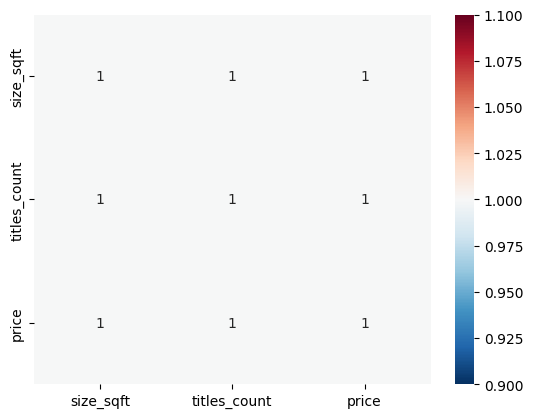

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(correlation_matrix,annot=True,cmap='RdBu_r')
plt.show()

In [15]:
#Removing highly correlated features(>0.9)
upper=correlation_matrix.where(
    np.triu(np.ones(correlation_matrix.shape),k=1).astype(bool)
)
to_drop=[column for column in upper.columns if any(upper[column]>0.9)]
print("Highly correlated featured to drop:",to_drop)

Highly correlated featured to drop: ['titles_count', 'price']


***Chi-Square Test***

In [16]:
x=pd.DataFrame({
    'Gender':[0,1,0,1,1],
    'Married':[1,1,0,0,1],
    'Income':[20000,40000,50000,30000,60000]
})

y=[0,1,1,0,1]
x

,Gender,Married,Income
0,0,1,20000
1,1,1,40000
2,0,0,50000
3,1,0,30000
4,1,1,60000


In [17]:
#Chi-Square requires non-negetive values
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x_sc=sc.fit_transform(x)
sltr=SelectKBest(score_func=chi2,k=2)
x_new=sltr.fit_transform(x_sc,y)
sltd_features=x.columns[sltr.get_support()]
print("Selected Features:",sltd_features)

Selected Features: Index(['Married', 'Income'], dtype='object')
